In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [18]:
# Load the data
# Assuming the CSV file is in the current directory with the name 'banana_index.csv'
df = pd.read_csv('bananaindex.csv')

# Explore the data to understand it better
print(df.head())

X = df[['land_use_kg', 'land_use_1000kcal', 'Land use per 100 grams of protein', 'Land use per 100 grams of fat']].values  # Assuming 'land_use' is the name of your feature column
y = df[['Bananas index (kg)', 'Bananas index (1000 kcalories)', 'Bananas index (100g protein)']].values  # Replace with actual column names

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # or median, or most_frequent
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

          entity  year  emissions_kg  emissions_1000kcal  \
0            Ale  2022      0.488690            0.317338   
1  Almond butter  2022      0.387011            0.067265   
2    Almond milk  2022      0.655888            2.222230   
3        Almonds  2022      0.602368            0.105029   
4    Apple juice  2022      0.458378            0.955184   

   emissions_100g_protein  emissions_100g_fat  land_use_kg  land_use_1000kcal  \
0                0.878525            2.424209     0.811485           0.601152   
1                0.207599            0.079103     7.683045           1.296870   
2               13.595512            4.057470     1.370106           2.675063   
3                0.328335            0.119361     8.230927           1.423376   
4               29.152212           19.754980     0.660629           1.382839   

   Land use per 100 grams of protein  Land use per 100 grams of fat  \
0                           1.577687                       3.065766   
1         

## Linear Regression

R-squared for the 1 target: 0.9562964971989433
R-squared for the 2 target: 0.8725734065893976
R-squared for the 3 target: 0.5261166929924423


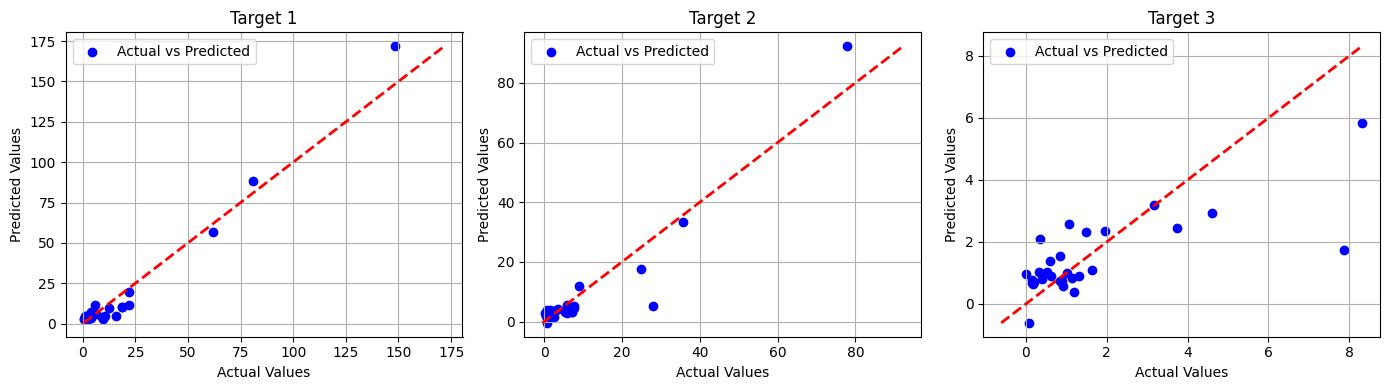

In [28]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate R-squared for the first target
for r in range(3):
    r2 = r2_score(y_test[:, r], y_pred[:, r])
    print(f'R-squared for the {r + 1} target: {r2}')

# If you want to visualize the results, you will need to plot each target separately.
# Here is an example of how you might plot the results for the first target.
plt.figure(figsize=(14, 4))

for i in range(y.shape[1]):
    plt.subplot(1, y.shape[1], i+1)
    plt.scatter(y_test[:, i], y_pred[:, i], color='blue', label='Actual vs Predicted')
    plt.title(f'Target {i+1}')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    # Plotting the diagonal line
    min_val = min(y_test[:, i].min(), y_pred[:, i].min())
    max_val = max(y_test[:, i].max(), y_pred[:, i].max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# # Save the model for future use
# import joblib
# joblib.dump(model, 'banana_index_predictive_model.pkl')